# 张量
## 神经网络的数据表示-张量
> 一般来说，当前所有机器学习系统都使用张量作为基本数据结构。张量对这个领域非常重要，重要到 Google 的
TensorFlow 都以它来命名。
张量这一概念的核心在于，它是一个数据容器。它包含的数据几乎总是数值数据，因此它
是数字的容器。你可能对矩阵很熟悉，它是二维张量。张量是矩阵向任意维度的推广［注意，
张量的维度（dimension）通常叫作轴（axis）］。

### 标量(0D 张量)
仅包含一个数字的张量叫作标量（scalar，也叫标量张量、零维张量、0D 张量）。在 Numpy
中，一个 float32 或 float64 的数字就是一个标量张量（或标量数组）。
标量张量有 0 个轴（ndim == 0）。张量轴的个数也叫作
阶（rank）。下面是一个 Numpy 标量。

In [2]:
import numpy as np

x = np.array(12)
print(x)
print(x.ndim)

12
0


### 向量（1D 张量）
数字组成的数组叫作向量（vector）或一维张量（1D 张量）。一维张量只有一个轴。下面是
一个 Numpy 向量。


In [3]:
x = np.array([12, 4, 6, 7])
print(x)
print(x.ndim)

[12  4  6  7]
1
<class 'numpy.ndarray'>


这个向量有4个元素，所以被称为4D向量，4D向量和4D张量是完全不同的概念
+ 4D向量：只有一个轴，沿着轴有5个维度
+ 4D张量：有4个轴，每个轴有任意维度

> 维度
（dimensionality）可以表示沿着某个轴上的元素个数（比如 4D 向量），也可以表示张量中轴的个
数（比如 4D 张量），这有时会令人感到混乱。对于后一种情况，技术上更准确的说法是 4 阶张量
（张量的阶数即轴的个数），但 4D 张量这种模糊的写法更常见。

### 矩阵（2D 张量）
向量组成的数组叫作矩阵（matrix）或二维张量（2D 张量）。矩阵有 2 个轴（通常叫作行和
列）。你可以将矩阵直观地理解为数字组成的矩形网格。下面是一个 Numpy 矩阵。

In [13]:
x = np.array([[5, 23, 4], [4, 8, 9], [11, 23, 45]])
print(x)
print(x.ndim)

[[ 5 23  4]
 [ 4  8  9]
 [11 23 45]]
2


第一个轴上的元素叫做行（row）,第二个轴上的元素叫做列,在👆的例子中，`5 23 4` 是第一行，`5 4 11` 是第一列
### 3D 张量与更高维张量
将多个矩阵组合成一个新的数组，可以得到一个 3D 张量.

In [5]:
x = np.array(
    [[[5, 78, 2, 34, 0],
      [6, 79, 3, 35, 1],
      [7, 80, 4, 36, 2]],
     [[5, 78, 2, 34, 0],
      [6, 79, 3, 35, 1],
      [7, 80, 4, 36, 2]],
     [[5, 78, 2, 34, 0],
      [6, 79, 3, 35, 1],
      [7, 80, 4, 36, 2]]])
print(x.ndim)

3


依此类推，将多个3D张量组合成一个数组，就可以创建一个4D张量

### 关键属性
张量是由以下三个属性来定义的
+ **轴的个数（阶）**。例如，3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中
也叫张量的 ndim。
+ **形状**。这是一个整数元组，表示张量沿每个轴的维度大小（元素个数）。例如，前面矩
阵示例的形状为 (3, 5)，3D 张量示例的形状为 (3, 3, 5)。向量的形状只包含一个
元素，比如 (5,)，而标量的形状为空，即 ()。
+ **数据类型**。（在 Python 库中通常叫作 dtype）。这是张量中所包含数据的类型，例如，张
量的类型可以是 float32、uint8、float64 等。在极少数情况下，你可能会遇到字符
（char）张量。注意，Numpy（以及大多数其他库）中不存在字符串张量，因为张量存
储在预先分配的连续内存段中，而字符串的长度是可变的，无法用这种方式存储。

再看一个MNIST数据的例子:

先导入数据

In [6]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Init Plugin
Init Graph Optimizer
Init Kernel


👀一下训练数据,依次看轴，形状和数据类型

In [7]:
print(train_images.ndim)
print(test_images.shape)
print(train_images.dtype)

3
(10000, 28, 28)
uint8


由👆可以看出，`train_images`是一个由 8 位整数组成的 3D 张量，更确切地说，它是60000个矩阵组成的数组，每个矩阵由 28×28 个整数组成。每个这样的矩阵都是一张灰度图像，元素
取值范围为 0~255。

用 Matplotlib 库（Python 标准科学套件的一部分）来显示这个 3D 张量中的第 315 个数字

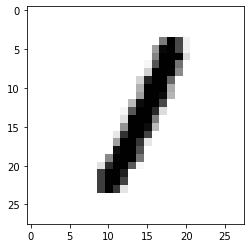

In [8]:
import matplotlib.pyplot as plt

digit = train_images[315]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 在numpy中操作张量
在👆的代码中，选择第315张图片的语法叫做张量切片（tensor slicing），也就是选择张量的特定元素。在numpy数组中上的张量切片运算。
👇这个例子中选择第 10~100 个数字（不包括第 100 个），并将其放在形状为 (90, 28, 28) 的数组中。三种写法等价

In [9]:
sugar_slice = train_images[10:100]
print(sugar_slice.shape)
# 更复杂的写法：给出了切片沿着每个张量轴的起始索引和结束索引。注意，: 等同于选择整个轴。
sugar_slice = train_images[10:100, :, :]
print(sugar_slice.shape)

sugar_slice = train_images[10:100, 0:28, 0:28]
print(sugar_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


沿着每个张量轴在任意两个索引之间进行选择。例如在所有图像的右下角选出 14 像素×14 像素的区域：

In [10]:
sugar_slice = train_images[:, 14:, 14:]
print(sugar_slice.shape)

(60000, 14, 14)


也可以使用负数索引。与 Python 列表中的负数索引类似，它表示与当前轴终点的相对位置。可以在图像中心裁剪出 14 像素×14 像素的区域：

In [11]:
sugar_slice = train_images[:, 7:-7, 7:-7]
print(sugar_slice.shape)

(60000, 14, 14)


### 现实世界中的数据张量
+ **向量数据**：2D 张量，形状为 (samples, features)
+ **序列数据**：3D 张量，形状为 (samples, timesteps, features)。
+ **图像**：4D 张量，形状为 (samples, height, width, channels) 或 (samples, channels, height, width)。
+ **视频**：5D 张量，形状为 (samples, frames, height, width, channels) 或 (samples, frames, channels, height, width)。